# Portfolio Tuesday

We will be using the turnover dataset 

https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv'

for this portfolio to do 3 things:

## Unsupervised ML

- Prepare the dataset (select the columns that are useful)
- Preprocess (Scale)
- Reduce dimensionality and perhaps make a scatterplot of the data
- Examine the reduced data

## Supervised ML

- Preprocess the data
- Try to predict "churn" using a simple model (Logistic Regression)
- Try a more advanced model (e.g. Random Forest)
- Evaluate your model
- Predict "satisfaction" (!!! This is a regression model)
- Evaluate the regression model



In [0]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [0]:
turnover = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')

In [23]:
turnover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
salary_recode           14999 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


### Prepare the Dataset

#### Select the Data

In [140]:
turnover.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [0]:
salary_mapper = {'low':0, 'medium':1, 'high':2}

In [0]:
turnover['salary_recode'] = turnover.salary.map(salary_mapper)

In [143]:
turnover['salary_recode'].unique()

array([0, 1, 2])

In [144]:
turnover.department.value_counts(normalize=True)

sales         0.276
technical     0.181
support       0.149
IT            0.082
product_mng   0.060
marketing     0.057
RandD         0.052
accounting    0.051
hr            0.049
management    0.042
Name: department, dtype: float64

In [0]:
dep_matrix = pd.get_dummies(turnover.department)

In [0]:
data = pd.concat([turnover, dep_matrix], axis = 1)

In [0]:
data.drop(['department', 'salary'], axis=1, inplace=True)

In [147]:
data

satisfaction  evaluation  number_of_projects  ...  sales  support  technical
0             0.380       0.530                   2  ...      1        0          0
1             0.800       0.860                   5  ...      1        0          0
2             0.110       0.880                   7  ...      1        0          0
3             0.720       0.870                   5  ...      1        0          0
4             0.370       0.520                   2  ...      1        0          0
...             ...         ...                 ...  ...    ...      ...        ...
14994         0.400       0.570                   2  ...      0        1          0
14995         0.370       0.480                   2  ...      0        1          0
14996         0.370       0.530                   2  ...      0        1          0
14997         0.110       0.960                   6  ...      0        1          0
14998         0.370       0.520                   2  ...      0        1          0

[14999 rows x 21 columns]

In [0]:
# Select the variable needed for dimensionality reduction
X = [...]

### Scaling

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [0]:
data_scaled = scaler.fit_transform(data)

In [95]:
pd.DataFrame(data_scaled, columns = data.columns).describe()

satisfaction  evaluation  ...   support  technical
count     14999.000   14999.000  ... 14999.000  14999.000
mean         -0.000      -0.000  ...     0.000      0.000
std           1.000       1.000  ...     1.000      1.000
min          -2.103      -2.080  ...    -0.418     -0.471
25%          -0.695      -0.912  ...    -0.418     -0.471
50%           0.109       0.023  ...    -0.418     -0.471
75%           0.833       0.899  ...    -0.418     -0.471
max           1.557       1.659  ...     2.394      2.125

[8 rows x 18 columns]

#### Dimensionality Reduction

In [0]:
# Import the module and instantiate a PCA object
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from sklearn.decomposition import PCA
model = PCA(n_components=5)

# Fit and transform the data
data_reduced = model.fit_transform(data_scaled)

In [0]:
data_reduced = pca.fit_transform(data_scaled)

In [55]:
# Make sure the data shape is as it should be
data_reduced.shape

(14999, 5)

#### Exploring the PCA

In [0]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()

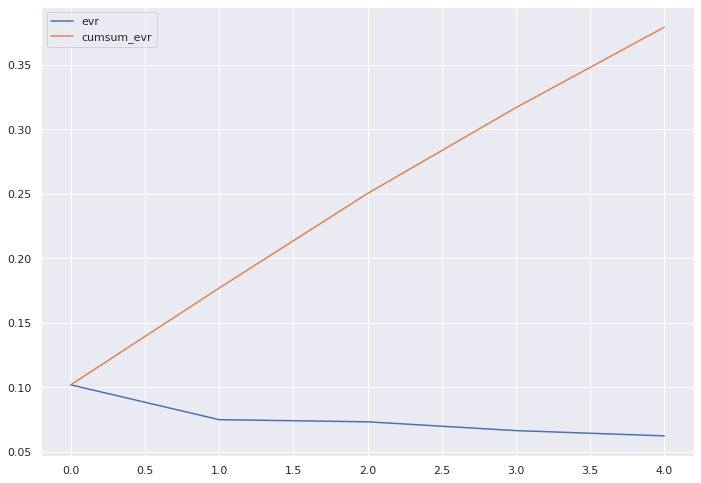

In [57]:
# Is 5 components really a good choice?
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [58]:
# How much "information" do we kick out?
model.explained_variance_ratio_.sum()

0.3793025609752687

In [0]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

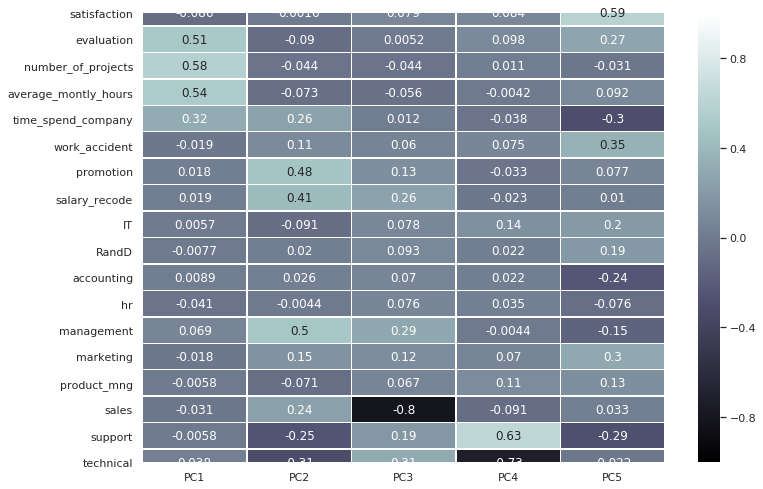

In [60]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

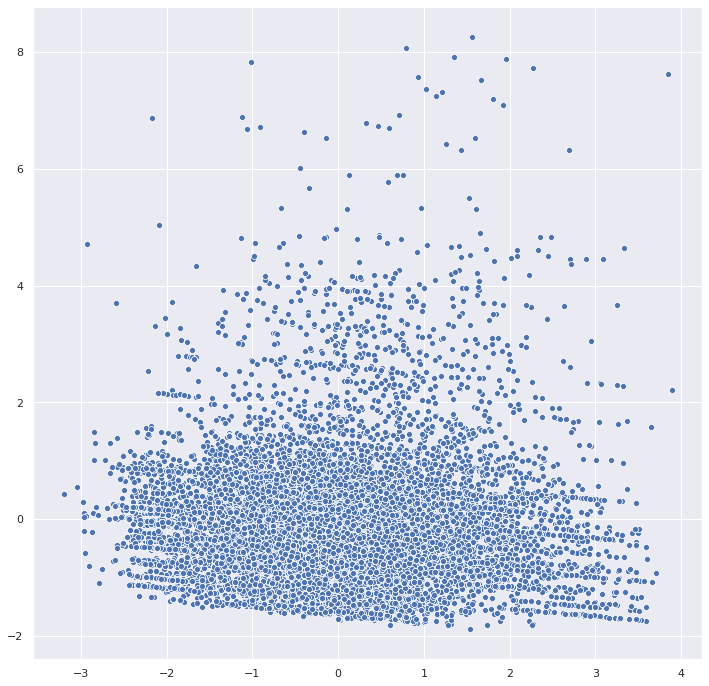

In [61]:
# Now we can plot in our points
plt.figure(figsize=(12,12))
g = sns.scatterplot(data_reduced[:,0], data_reduced[:,1],
                    legend='full', palette='viridis')

legend = g.get_legend()

In [0]:
# Define the data that we are going to use as a dataframe
d = pd.DataFrame({'y': data_reduced[:,1],
                 'x': data_reduced[:,0], 
                 'department': turnover.department, 
                 'salary': turnover['salary']})
e = alt.data_transformers.disable_max_rows()

In [68]:
alt.Chart(d).mark_point().encode(
    x='x',
    y='y',
    color='department',
    tooltip=['salary']
).interactive()

alt.Chart(...)

In [69]:
alt.Chart(d).mark_point().encode(
    x='x',
    y='y',
    color='salary',
    tooltip=['department']
).interactive()

alt.Chart(...)

In [0]:
data['quadrant'] = 0

In [0]:
q1 = data[(d['x'] < 0) & (d['y'] < 0)].index
q2 = data[(d['x'] < 0) & (d['y'] >= 0)].index
q3 = data[(d['x'] >= 0) & (d['y'] < 0)].index
q4 = data[(d['x'] >= 0) & (d['y'] >= 0)].index

In [72]:
data['quadrant'][q1] = 1
data['quadrant'][q2] = 2
data['quadrant'][q3] = 3
data['quadrant'][q4] = 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

In [73]:
data.groupby(['quadrant']).mean()

satisfaction  evaluation  ...  support  technical
quadrant                            ...                    
1                0.635       0.635  ...    0.251      0.288
2                0.625       0.607  ...    0.029      0.027
3                0.568       0.831  ...    0.225      0.306
4                0.631       0.799  ...    0.030      0.028

[4 rows x 18 columns]

#### Clustering

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [0]:
X = pd.DataFrame(data_scaled,columns=data.columns)
X_1 = pd.DataFrame(data_scaled, columns=data.columns)
linked = linkage(X, 'ward')

In [124]:
X_1

satisfaction  evaluation  number_of_projects  ...  sales  support  technical
0            -0.936      -1.087              -1.463  ...  1.620   -0.418     -0.471
1             0.753       0.841               0.971  ...  1.620   -0.418     -0.471
2            -2.022       0.958               2.594  ...  1.620   -0.418     -0.471
3             0.431       0.899               0.971  ...  1.620   -0.418     -0.471
4            -0.977      -1.146              -1.463  ...  1.620   -0.418     -0.471
...             ...         ...                 ...  ...    ...      ...        ...
14994        -0.856      -0.854              -1.463  ... -0.617    2.394     -0.471
14995        -0.977      -1.379              -1.463  ... -0.617    2.394     -0.471
14996        -0.977      -1.087              -1.463  ... -0.617    2.394     -0.471
14997        -2.022       1.425               1.782  ... -0.617    2.394     -0.471
14998        -0.977      -1.146              -1.463  ... -0.617    2.394     -0.471

[14999 rows x 18 columns]

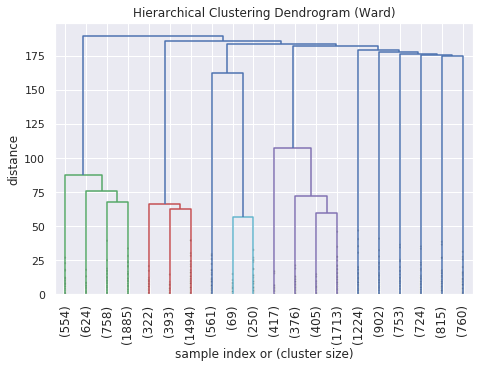

In [125]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linked,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [126]:
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    labels=cluster.labels_
    dbs=davies_bouldin_score(X, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(X, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(X, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    X['cluster'+k]=labels

Cluster count- 2 |  db score- 2.72 |  ch score -  1071.76 |  ss score -  0.04
Cluster count- 3 |  db score- 2.43 |  ch score -  1219.02 |  ss score -  0.09
Cluster count- 4 |  db score- 2.09 |  ch score -  1450.63 |  ss score -  0.13
Cluster count- 5 |  db score- 2.04 |  ch score -  1960.97 |  ss score -  0.21
Cluster count- 6 |  db score- 1.65 |  ch score -  2564.26 |  ss score -  0.28
Cluster count- 7 |  db score- 1.44 |  ch score -  3215.79 |  ss score -  0.34
Cluster count- 8 |  db score- 1.28 |  ch score -  4118.54 |  ss score -  0.4
Cluster count- 9 |  db score- 1.13 |  ch score -  5354.62 |  ss score -  0.46
Cluster count- 10 |  db score- 0.96 |  ch score -  6841.02 |  ss score -  0.52


In [127]:
X_1

satisfaction  evaluation  number_of_projects  ...  sales  support  technical
0            -0.936      -1.087              -1.463  ...  1.620   -0.418     -0.471
1             0.753       0.841               0.971  ...  1.620   -0.418     -0.471
2            -2.022       0.958               2.594  ...  1.620   -0.418     -0.471
3             0.431       0.899               0.971  ...  1.620   -0.418     -0.471
4            -0.977      -1.146              -1.463  ...  1.620   -0.418     -0.471
...             ...         ...                 ...  ...    ...      ...        ...
14994        -0.856      -0.854              -1.463  ... -0.617    2.394     -0.471
14995        -0.977      -1.379              -1.463  ... -0.617    2.394     -0.471
14996        -0.977      -1.087              -1.463  ... -0.617    2.394     -0.471
14997        -2.022       1.425               1.782  ... -0.617    2.394     -0.471
14998        -0.977      -1.146              -1.463  ... -0.617    2.394     -0.471

[14999 rows x 18 columns]

In [128]:
X

satisfaction  evaluation  ...  cluster9  cluster10
0            -0.936      -1.087  ...         7          2
1             0.753       0.841  ...         7          2
2            -2.022       0.958  ...         3          1
3             0.431       0.899  ...         7          2
4            -0.977      -1.146  ...         7          2
...             ...         ...  ...       ...        ...
14994        -0.856      -0.854  ...         2          5
14995        -0.977      -1.379  ...         2          5
14996        -0.977      -1.087  ...         2          5
14997        -2.022       1.425  ...         2          5
14998        -0.977      -1.146  ...         2          5

[14999 rows x 27 columns]



... and the results for 2 clusters are!
cluster2                  0      1
satisfaction         -0.040  0.110
evaluation            0.030 -0.100
number_of_projects    0.050 -0.140
average_montly_hours  0.030 -0.090
time_spend_company   -0.000  0.000
work_accident        -0.000  0.000
promotion             0.050 -0.150
salary_recode         0.020 -0.060
IT                    0.100 -0.300
RandD                 0.080 -0.240
accounting            0.080 -0.230
hr                    0.080 -0.230
management            0.070 -0.210
marketing             0.080 -0.250
product_mng           0.090 -0.250
sales                -0.550  1.620
support               0.140 -0.420
technical             0.160 -0.470
cluster3              0.400  1.000
cluster4              0.470  3.000
cluster5              1.520  3.000
cluster6              1.740  4.000
cluster7              3.060  1.000
cluster8              2.350  6.000
cluster9              3.030  7.000
cluster10             3.950  2.000

And the size

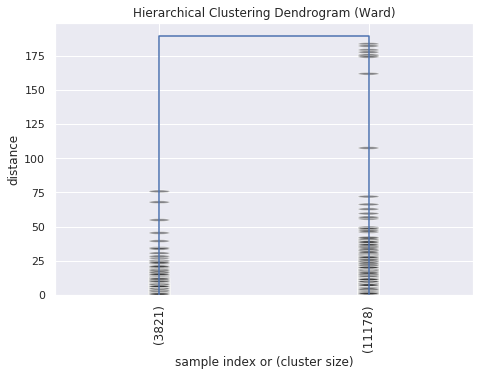



... and the results for 3 clusters are!
cluster3                  0      1      2
satisfaction         -0.050  0.110  0.020
evaluation            0.030 -0.100  0.040
number_of_projects    0.060 -0.140  0.000
average_montly_hours  0.040 -0.090 -0.010
time_spend_company    0.020  0.000 -0.070
work_accident        -0.010  0.000  0.030
promotion             0.100 -0.150 -0.150
salary_recode         0.040 -0.060 -0.070
IT                    0.200 -0.300 -0.300
RandD                 0.160 -0.240 -0.240
accounting            0.160 -0.230 -0.230
hr                    0.150 -0.230 -0.230
management            0.140 -0.210 -0.210
marketing             0.170 -0.250 -0.250
product_mng           0.170 -0.250 -0.250
sales                -0.540  1.620 -0.620
support              -0.410 -0.420  2.390
technical             0.320 -0.470 -0.470
cluster2              0.000  1.000  0.000
cluster4              0.100  3.000  2.000
cluster5              1.400  3.000  2.000
cluster6              1.430  4.000

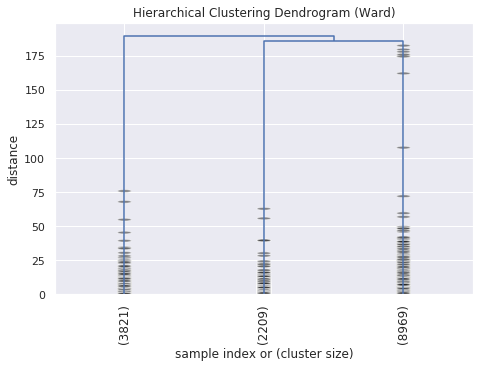



... and the results for 4 clusters are!
cluster4                  0      1      2      3
satisfaction         -0.070  0.090  0.020  0.110
evaluation            0.030  0.020  0.040 -0.100
number_of_projects    0.060  0.030  0.000 -0.140
average_montly_hours  0.040  0.010 -0.010 -0.090
time_spend_company   -0.030  0.440 -0.070  0.000
work_accident        -0.020  0.110  0.030  0.000
promotion            -0.150  2.370 -0.150 -0.150
salary_recode        -0.030  0.660 -0.070 -0.060
IT                    0.250 -0.290 -0.300 -0.300
RandD                 0.190 -0.100 -0.240 -0.240
accounting            0.190 -0.160 -0.230 -0.230
hr                    0.190 -0.150 -0.230 -0.230
management           -0.210  3.360 -0.210 -0.210
marketing             0.190 -0.040 -0.250 -0.250
product_mng           0.220 -0.250 -0.250 -0.250
sales                -0.560 -0.360 -0.620  1.620
support              -0.420 -0.350  2.390 -0.420
technical             0.390 -0.390 -0.470 -0.470
cluster2              0.000

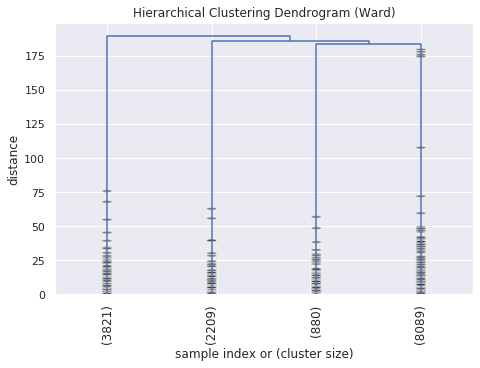



... and the results for 5 clusters are!
cluster5                  0      1      2      3      4
satisfaction         -0.010  0.090  0.020  0.110 -0.170
evaluation           -0.010  0.020  0.040 -0.100  0.100
number_of_projects   -0.020  0.030  0.000 -0.140  0.200
average_montly_hours -0.010  0.010 -0.010 -0.090  0.140
time_spend_company   -0.030  0.440 -0.070  0.000 -0.020
work_accident        -0.010  0.110  0.030  0.000 -0.040
promotion            -0.150  2.370 -0.150 -0.150 -0.150
salary_recode        -0.000  0.660 -0.070 -0.060 -0.060
IT                    0.560 -0.290 -0.300 -0.300 -0.300
RandD                 0.420 -0.100 -0.240 -0.240 -0.240
accounting            0.430 -0.160 -0.230 -0.230 -0.230
hr                    0.420 -0.150 -0.230 -0.230 -0.230
management           -0.210  3.360 -0.210 -0.210 -0.210
marketing             0.430 -0.040 -0.250 -0.250 -0.250
product_mng           0.480 -0.250 -0.250 -0.250 -0.250
sales                -0.620 -0.360 -0.620  1.620 -0.450
suppor

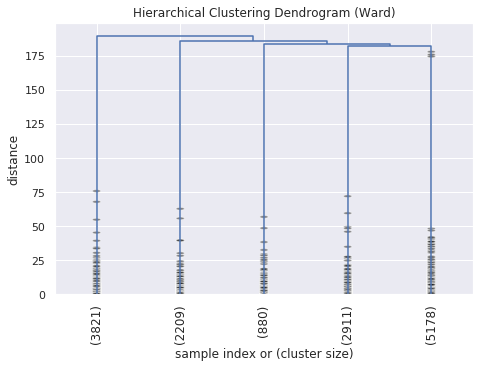



... and the results for 6 clusters are!
cluster6                  0      1      2      3      4      5
satisfaction         -0.020  0.090 -0.170  0.020  0.110  0.020
evaluation           -0.010  0.020  0.100  0.040 -0.100  0.010
number_of_projects   -0.030  0.030  0.200  0.000 -0.140  0.010
average_montly_hours -0.020  0.010  0.140 -0.010 -0.090  0.030
time_spend_company   -0.040  0.440 -0.020 -0.070  0.000 -0.020
work_accident        -0.000  0.110 -0.040  0.030  0.000 -0.030
promotion            -0.150  2.370 -0.150 -0.150 -0.150 -0.150
salary_recode         0.010  0.660 -0.060 -0.070 -0.060 -0.040
IT                   -0.300 -0.290 -0.300 -0.300 -0.300  3.350
RandD                 0.630 -0.100 -0.240 -0.240 -0.240 -0.240
accounting            0.630 -0.160 -0.230 -0.230 -0.230 -0.230
hr                    0.620 -0.150 -0.230 -0.230 -0.230 -0.230
management           -0.210  3.360 -0.210 -0.210 -0.210 -0.210
marketing             0.640 -0.040 -0.250 -0.250 -0.250 -0.250
product_mng  

KeyboardInterrupt: ignored

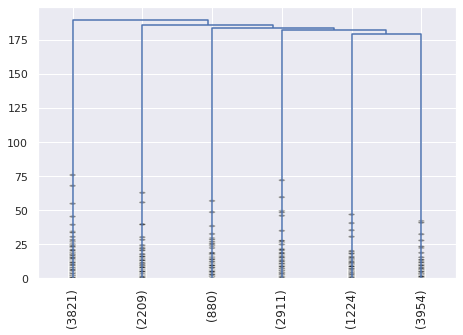

In [130]:
for i in range(2,11):
	i=str(i)
	stuff=X.groupby(['cluster'+i]).mean()
	trans_stuff=stuff.T
	ts=round(trans_stuff,2)
	print("")
	print("")
	print('... and the results for' ,i, 'clusters are!')	
	print(ts)
	print("")
	count=X.groupby(['cluster'+i]).count()
	print("And the size of the clusters if there are",i, "clusters are")
	print(count)
	print("")
	print("And if we have",i,"clusters, the dendrogram looks like")
	i=int(i)
	figure = plt.figure(figsize=(7.5, 5))
	dendrogram(
	        linked,
		truncate_mode='lastp',  # show only the last p merged clusters
		p=i,  # show only the last p merged clusters
		leaf_rotation=90.,
		leaf_font_size=12.,
		show_contracted=True,  # to get a distribution impression in truncated branches
	)
	plt.title('Hierarchical Clustering Dendrogram (Ward)')
	plt.xlabel('sample index or (cluster size)')
	plt.ylabel('distance')
	plt.show()

### KMeans clustering - virker ikke pt

In [0]:
from sklearn.cluster import KMeans


clusterer = KMeans(n_clusters = 3)

In [0]:
z = clusterer.fit(data_scaled,)

In [135]:
print(z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


## Supervised ML

- Preprocess the data
- Try to predict "churn" using a simple model (Logistic Regression)
- Try a more advanced model (e.g. Random Forest)
- Evaluate your model
- Predict "satisfaction" (!!! This is a regression model)
- Evaluate the regression model

### Preprocess the data

In [137]:
!pip uninstall -qq matplotlib
!pip install -qq -U matplotlib

Proceed (y/n)? y
y
     |████████████████████████████████| 13.1MB 180kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt


sns.set(rc={'figure.figsize':(10,10)})

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
churn                   14999 non-null int64
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
promotion               14999 non-null int64
salary_recode           14999 non-null int64
IT                      14999 non-null uint8
RandD                   14999 non-null uint8
accounting              14999 non-null uint8
hr                      14999 non-null uint8
management              14999 non-null uint8
marketing               14999 non-null uint8
product_mng             14999 non-null uint8
sales                   14999 non-null uint8
support                 14999 non-null uint8
technical               14999 non-null uint8
dtypes: float64(2), int64(7), ui

In [0]:
#Reorder columns
cols = list(data.columns.values) #Make a list of all of the columns in the data
cols.pop(cols.index('churn')) #Remove 'churn from list
data = data[['churn'] + cols]

In [0]:
X = data.loc[:,'evaluation':'technical']

In [0]:
# Define the dependant variabel / target to predict (world region)
y = data['churn']

In [161]:
y.unique()

array([1, 0])

In [0]:
# Load and instantiate a StandardScaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [0]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [0]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

In [166]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

[0.74833333 0.74583333 0.74541667 0.74791667 0.75197999]
0.7523333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [168]:
# Performance evaluation using the classification_report

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      2294
           1       0.32      0.05      0.08       706

    accuracy                           0.75      3000
   macro avg       0.54      0.51      0.47      3000
weighted avg       0.66      0.75      0.67      3000



75% accuracy, not that good.

#### Visual interpretation

In [169]:
# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -qq -U mlxtend

     |████████████████████████████████| 1.3MB 3.4MB/s 


In [0]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faa9574fb70>)

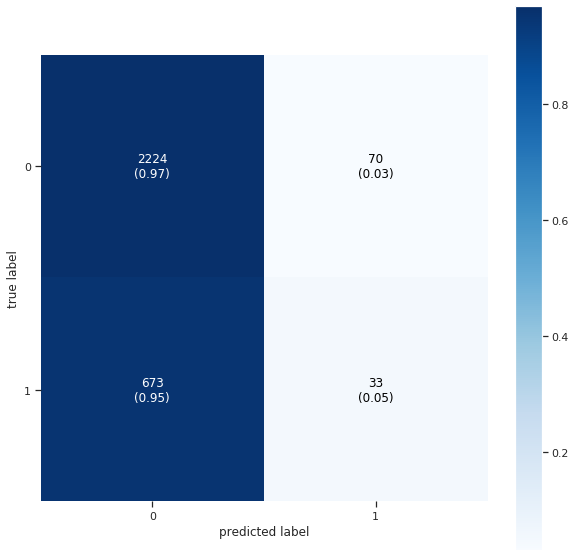

In [172]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True)

In [173]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.97166667 0.98083333 0.97791667 0.9825     0.97874114]
0.9753333333333334


In [174]:
# Performance evaluation using the classification_report

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2294
           1       0.96      0.94      0.95       706

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faa93f0b160>)

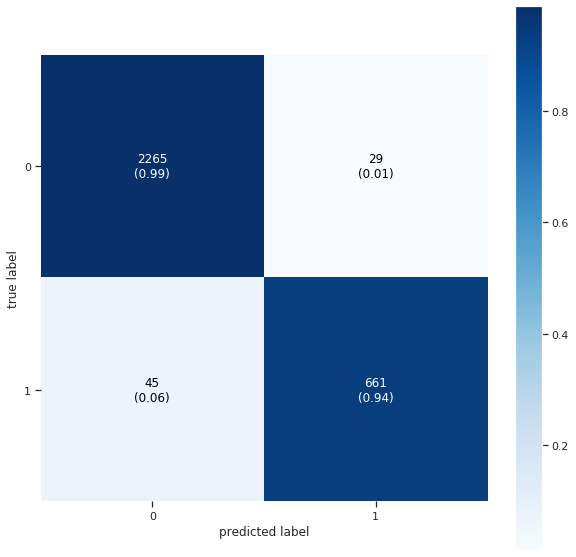

In [175]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True)

### Predict satisfaction

In [0]:
# picking a different outcome variable

y_reg = data.satisfaction

In [0]:
# We need to creat new train / test splits here - as the nomad_score was not part of the previous split.

X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_scaled, y_reg, data, test_size = 0.2, random_state = 42)

In [184]:
# Import and instantiate a XGBoost Regressor
import xgboost as xgb
model = xgb.XGBRegressor()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:03:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.4167026723862131


This model explains 40% of the variance in the data, which really isn't that particularly great.

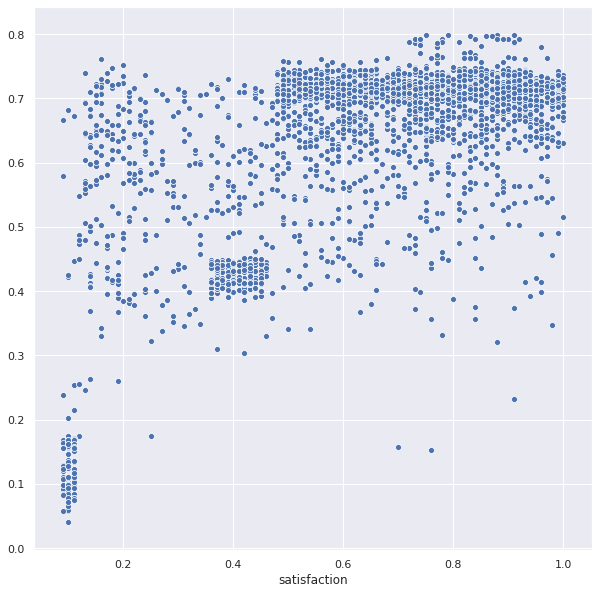

In [185]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

In [188]:
data_test['satisfaction_pred'] = y_pred

alt.Chart(data_test).mark_circle(size=60).encode(
    x='satisfaction',
    y='satisfaction_pred',
    color=alt.Color('number_of_projects', scale=alt.Scale(scheme='category10')),
    tooltip=['work_accident','salary_recode','promotion']
).interactive()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


alt.Chart(...)

In [198]:
data_test['department'] = turnover['department']

alt.Chart(data_test).mark_circle(size=60).encode(
    x='satisfaction',
    y='satisfaction_pred',
    color=alt.Color('department', scale=alt.Scale(scheme='category10')),
    tooltip=['promotion','salary_recode','number_of_projects']
).interactive()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


alt.Chart(...)